# Following S. Datta, Lessons from Nanoelectronics B

## Sec. 19.1.1 of Datta, Lessons...B
- see Lessons from Nanoelectronics: B, Sec. 17.4.1

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

from fuNEGF.models import LinearChain

In [186]:
N = 100         # keep even ; the number of atoms in the channel; the (first, last) atom is in contact with the (left, right) channel
eps_0 = 0       # eV; the on-site energ
t = 1.0         # eV;  the hopping parameter
a = 1.0         # Angstrom; the lattice constant

N = 2*(N//2) # make sure N is even

## Model definition

### 1. Hamiltonian

1D chain with nearest-neighbor hopping:

$$ \hat{H}_{ij} = \begin{cases}\epsilon_0, & \text { if } i=j \\ t, & \text { if } i \neq j \end{cases}$$

or in matrix form

$$ \hat{H}=\left[\begin{array}{ccccc}
\epsilon_0 & t & 0 & 0 & \cdots & 0 & 0 & 0 \\
t & \epsilon_0 & t & 0 & \cdots & 0 & 0 & 0 \\
0 & t & \epsilon_0 & t & \cdots & 0 & 0 & 0 \\
0 & 0 & t & \epsilon_0 & \cdots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & \epsilon_0 & t & 0 \\
 0 & 0 & 0 & 0 & \cdots & t & \epsilon_0  & t \\
0 & 0 & 0 & 0 & \cdots & 0 & t & \epsilon_0
\end{array}\right]
$$

giving a dispersion relation (within an approximation -- periodic boundary conditions are actually *not* applied in the Hamiltonian above)

$$ E (k) = \epsilon + 2 t \cos(k a)\,, \;\;\;\;\;\; k \in \{ 0, 1, ..., N-1 \} \cdot 2\pi/(N a) $$

### 2. Self-energy

Self-energies for contact 1 and 2

$$
\Sigma_1=\left[\begin{array}{ccccc}
\mathrm{te}^{i k a} & 0 & 0 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 0
\end{array}\right], \quad \Sigma_2=\left[\begin{array}{ccccc}
0 & \cdots & 0 & 0 & 0 \\
\vdots & \ddots & \vdots & \vdots & \vdots \\
0 & \cdots & 0 & 0 & 0 \\
0 & \cdots & 0 & 0 & 0 \\
0 & \cdots & 0 & 0 & \mathrm{te}^{i k a}
\end{array}\right]
$$

with the broadening functions $\Gamma \equiv i\left[ \Sigma - \Sigma^\dagger\right] $ 

$$
\Gamma_1=\frac{\hbar v}{a}\left[\begin{array}{ccccc}
1 & 0 & 0 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 0
\end{array}\right], \quad \Gamma_2=\frac{\hbar v}{a}\left[\begin{array}{ccccc}
0 & \cdots & 0 & 0 & 0 \\
\vdots & \ddots & \vdots & \vdots & \vdots \\
0 & \cdots & 0 & 0 & 0 \\
0 & \cdots & 0 & 0 & 0 \\
0 & \cdots & 0 & 0 & 1
\end{array}\right]
$$

where $v=\mathrm{d} E /(\hbar \mathrm{d} k) = -2 a t / \hbar \sin (k a)$ so that $\frac{\hbar v}{a} = -2 t / \sin (k a)$

### 3. In-scattering
$$ \Sigma^\mathrm{in}_{1,2} = \Gamma_{1,2} \cdot f_{1,2} $$
 where $f_i$ is the Fermi-Dirac distribution function for contact $i$.

## NEGF Equations

The *retarded Green's function*
$$
\mathbf{G}^{\mathrm{R}}=[E \mathbf{I}-\mathbf{H}-\mathbf{\Sigma}]^{-1}
$$

along with the *advanced Green's function*
$$
    \mathbf{G}^{\mathrm{A}} = \left[ \mathbf{G}^{\mathrm{R}} \right]^\dagger
$$

provide the *spectral function*
$$
\mathbf{A}=i\left[\mathbf{G}^{\mathrm{R}}-\mathbf{G}^{\mathrm{A}}\right]
$$

and are used to solve for the *"electron occupation" Green's function* ($\mathbf{G}^{\mathrm{n}} \equiv -i \mathbf{G}^< $)
$$
\mathbf{G}^{\mathrm{n}}=\mathbf{G}^{\mathrm{R}} \Sigma^{\mathrm{in}} \mathbf{G}^{\mathrm{A}}
$$

which gives the *density matrix* 

$$
    \hat{\rho} = \mathbf{G}^{\mathrm{n}} / 2\pi \,.
$$


Both, the self-energy $\mathbf{\Sigma}$ and the in-scattering term $\Sigma^{\mathrm{in}}$ are sums of the left contact and right contact, while the self-energy also contains an intrinsic term

$$ \begin{align}
        \mathbf{\Sigma}^{\mathrm{in}} &= \mathbf{\Sigma}^{\mathrm{in}}_1 + \mathbf{\Sigma}^{\mathrm{in}}_2 \,, \\
        \mathbf{\Sigma} &= \mathbf{\Sigma}_1 + \mathbf{\Sigma}_2 + \mathbf{\Sigma}_0 
   \end{align}        
$$

NOTE: We use the (physically expressive) notation of S. Datta, where the self-energies and Green's functions in relation to the standard notation (on the right) are defined as  

$$
\begin{align}
    \Sigma &\equiv \Sigma^\mathrm{R} \,, \\
    G^\mathrm{n} &\equiv -i G^< \,, \\
    \Sigma^\mathrm{in} &\equiv -i \Sigma^< \,.
\end{align}
$$

## Class definition
- packaged into the "fuNEGF" package; imported in the beginning

## Case studies

### Construct (a pure) Hamiltonian

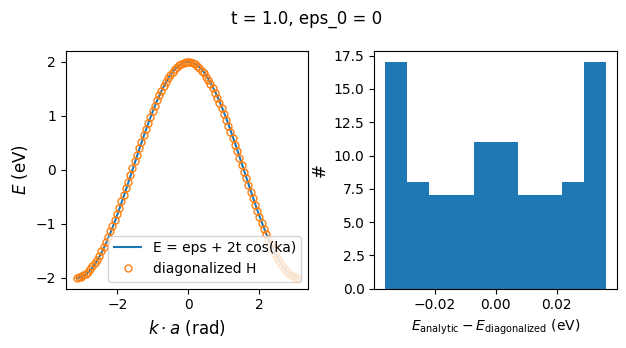

In [188]:
chain = LinearChain(N, eps_0, t, a, H_impurity=None, plot_dispersion=True)

- when periodic Hamiltonian enforced, the analytical dispersion relation indeed gives a precise dependence (energy error $\sim 10^{-15}$ eV)
- the order of the diagonalized eigenvectors needs to be imposed: {0, 2, 4, ..., N, N-1, ...., 1}

### Impurity - Quantum Resistors in Series
- a constant on-site potential on a single (or multiple) sites

$$ \hat{H}=\left[\begin{array}{ccccc}
\ddots & \vdots & \vdots & \vdots & \ddots \\
\cdots & \varepsilon & t & 0 & \cdots \\
\cdots & t & \varepsilon+U & t & \cdots \\
\cdots & 0 & t & \varepsilon & \cdots \\
\ddots & \vdots & \vdots & \vdots & \ddots
\end{array}\right]
$$

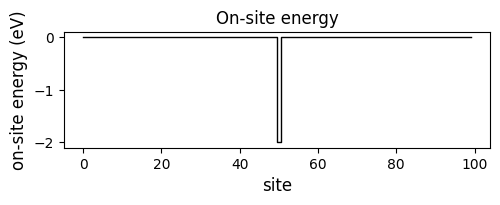

In [189]:
H_impurity = np.zeros((N, N), dtype=complex)

# (1) add a single impurity in the middle
H_impurity[N//2, N//2] += -2*t

# (2) add two impurities symmetrically at <position_scaterrer> from each end of the linear chain
# position_scaterrer = 18
# H_impurity[position_scaterrer, position_scaterrer] += -t
# H_impurity[-position_scaterrer, -position_scaterrer] += -t

chain.add_H_impurity(H_impurity, plot_dispersion=False)

chain.plot_onsite_energy()


### Plot the *Transmission function*

$\bar{T}(E)=\operatorname{Trace}\left[\boldsymbol{\Gamma}_1 \mathbf{G}^R \boldsymbol{\Gamma}_2 \mathbf{G}^A\right]$

Cases:
1. without impurities it is constant $T(E) = 1$ 
2. with a single impurity of $U=-2 t$, it reaches maximum of $T(E) = 0.5$
3. with two impurities of $U=-t$ each, the function looks almost the same, but with strong oscillations

c:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


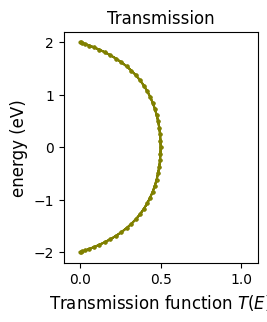

In [190]:
chain.plot_transmission()

### Phase / momentum relaxation

In [191]:
def plot_onsite_and_occupation(E_to_plot, D0_phase, D0_phase_momentum, N_sc):    
    fig, axes = plt.subplots(2, 1, figsize=(4.5, 6), sharex=True, height_ratios=[1, 2])
    plt.suptitle( r'occupation at $E = ' + f'{E_to_plot:.2f}' + r'$ eV' + '\n' + 
                    r'phase relaxed with $D_0^\mathrm{phase} = ' + f'{D0_phase:.2f}'  + r'$ eV$^2$ ' + '\n' + 
                    r'phase+momentum relaxed with $D_0^\mathrm{ph,mom} = ' + f'{D0_phase_momentum:.2f}' + r'$ eV$^2$ ', fontsize=12)

    chain.plot_onsite_energy(ax=axes[0])
    chain.plot_occupation(D0_phase, D0_phase_momentum, E_to_plot=E_to_plot, N_sc=N_sc, ax=axes[1])

    # make x-axes common
    axes[0].set_xlabel('')
    plt.tight_layout()

In [192]:
E_to_plot=eps_0+0.5*t
N_sc = 70

#### 1) No relaxation

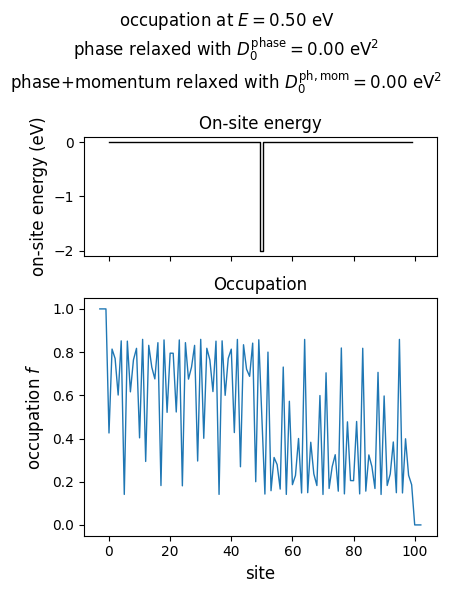

In [193]:
# no relaxation
D0_phase = 0.00*t**2
D0_phase_momentum = 0.00*t**2
plot_onsite_and_occupation(E_to_plot, D0_phase, D0_phase_momentum, N_sc)

#### 2. Phase relaxation

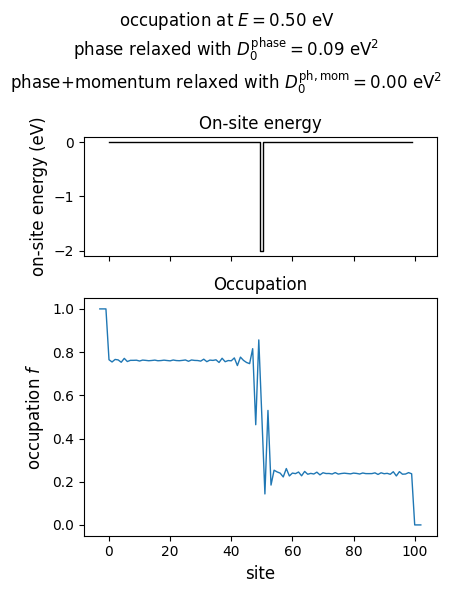

In [194]:
# only phase
D0_phase = 0.09*t**2
D0_phase_momentum = 0.00*t**2
plot_onsite_and_occupation(E_to_plot, D0_phase, D0_phase_momentum, N_sc)

#### 3. Phase and momentum relaxation

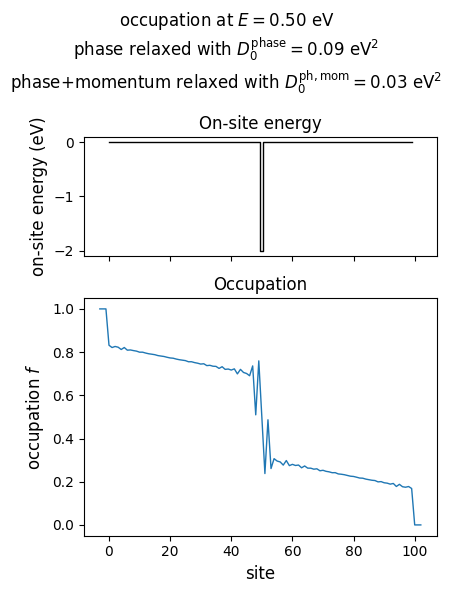

In [195]:
# phase and momentum
D0_phase = 0.09*t**2
D0_phase_momentum = 0.03*t**2
plot_onsite_and_occupation(E_to_plot, D0_phase, D0_phase_momentum, N_sc)

- after each barrier, the potential drops (when we put f=1 on the left and f=0 on the right)
- wild oscillations in occupation can be conveniently damped by phase relaxation
- additional momentum relaxation causes a steady decrease in the potential

### Multiple resistors

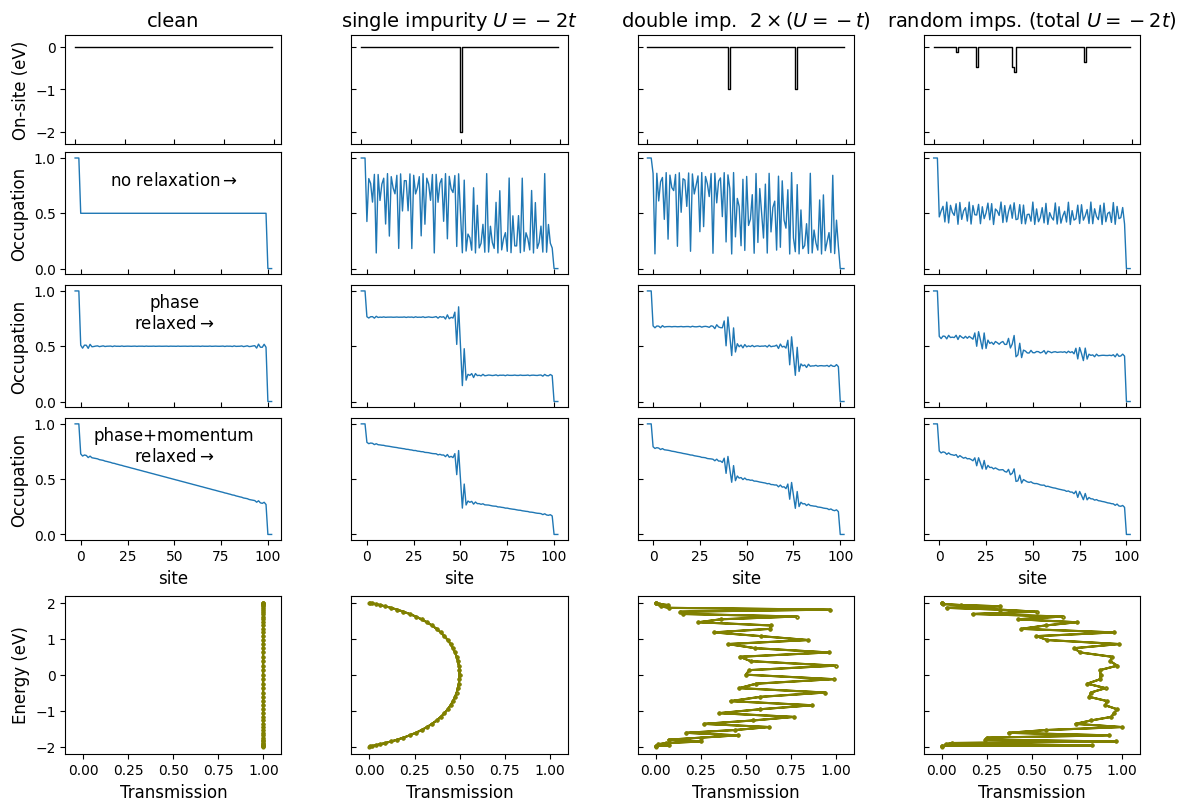

In [196]:
# RELAXATION
D0_phase = 0.12*t**2
D0_phase_momentum = 0.03*t**2
N_sc = 90

# IMPURITY HAMILTONIANS
H_imp_clean = np.zeros((N,N))
H_imp_single = np.zeros((N,N))
H_imp_single[N//2, N//2] = -2*t
H_imp_double = np.zeros((N,N))
H_imp_double[5*N//12, 5*N//12] = -t
H_imp_double[3*N//4, 3*N//4] = -t

   # multiple random impurities
H_imp_multiple = np.zeros((N,N))
N_random_impurities = randint(3, 7)
potential_ratios = [randint(1, 5) for _ in range(N_random_impurities)]
potentials = [potential_ratios[i]/sum(potential_ratios)*(-2*t) for i in range(N_random_impurities)]
positions = [randint(1, N-1) for _ in range(N_random_impurities)]
for i in range(N_random_impurities): H_imp_multiple[positions[i], positions[i]] = potentials[i]

H_impurities = [
    H_imp_clean,
    H_imp_single,
    H_imp_double,
    H_imp_multiple
]

impurity_titles = ['clean', r'single impurity $U=-2t$', r'double imp.  $2 \times (U=-t)$', r'random imps. (total $U=-2t$)']

# CALCULATE AND PLOT
fig, axes = plt.subplots(5, len(H_impurities), figsize=(2.5*len(H_impurities)+2, 8), height_ratios=[0.9, 1, 1, 1, 1.3], layout="constrained")
fig.set_constrained_layout_pads(w_pad=0.35) #, h_pad=4./72., hspace=0./72., wspace=0./72.)
for i, H_imp in enumerate(H_impurities):
    chain = LinearChain(N, eps_0, t, a, H_impurity=H_imp, plot_dispersion=False)
    chain.plot_onsite_energy(axes[0, i])
    chain.plot_occupation(D0_phase=0, D0_phase_momentum=0, E_to_plot=E_to_plot, N_sc=N_sc, ax=axes[1, i])
    chain.plot_occupation(D0_phase=D0_phase, D0_phase_momentum=0, E_to_plot=E_to_plot, N_sc=N_sc, ax=axes[2, i])
    chain.plot_occupation(D0_phase=D0_phase, D0_phase_momentum=D0_phase_momentum, E_to_plot=E_to_plot, N_sc=N_sc, ax=axes[3, i])
    chain.plot_transmission(axes[4, i])

   # labels, titles, limits, etc.
axes[0, 0].set_ylabel('On-site (eV)')
axes[1, 0].set_ylabel('Occupation')
axes[2, 0].set_ylabel('Occupation')
axes[3, 0].set_ylabel('Occupation')
axes[4, 0].set_ylabel('Energy (eV)')
for j in range(1, len(H_impurities)):
    for i in range(5):
        axes[i, j].set_yticklabels([])
        axes[i, j].set_ylabel('')
        axes[i, j].tick_params(axis='y', direction='in')
   # set all titles empty string
for j in range(len(H_impurities)):
    axes[4, j].set_xlabel('Transmission')
    for i in range(5): axes[i, j].set_title('')
    axes[0, j].set_title(impurity_titles[j], fontsize=14)
    for i in range(3):
        axes[i, j].set_xticklabels([])
        axes[i, j].set_xlabel('')
        # ticks inside
        axes[i, j].tick_params(axis='x', direction='in')
text_left = N//2
text_top = 0.8
axes[1, 0].text(text_left, text_top, 'no relaxation'+r'$\rightarrow$', fontsize=12, rotation=0, ha='center', va='center')
axes[2, 0].text(text_left, text_top, 'phase\nrelaxed'+r'$\rightarrow$', fontsize=12, rotation=0, ha='center', va='center')
axes[3, 0].text(text_left, text_top, 'phase+momentum\nrelaxed'+r'$\rightarrow$', fontsize=12, rotation=0, ha='center', va='center')
# all on-site energy plots have the same y-axis
margin = 0.08
y_max = max([axes[0, i].get_ylim()[1] for i in range(len(H_impurities))])
y_min = min([axes[0, i].get_ylim()[0] for i in range(len(H_impurities))])
for j in range(len(H_impurities)): axes[0, j].set_ylim([y_min-margin*(y_max-y_min), y_max+margin*(y_max-y_min)])
